# **CSC17103 - Colab 1 - Luật lũy thừa**

Đây là Bài tập 01 trong môn học Khai thác Dữ liệu Đồ thị (Graph Mining) - CSC1703 tại Khoa Công nghệ Thông tin, Trường Đại học Khoa học Tự nhiên, Đại học Quốc gia TP.HCM

(Cập nhật lần cuối: 27/05/2024)

Họ tên: Dương Trường Bình

MSSV: 21127229

## **Mục tiêu của bài tập**



## **Cách thực hiện và nộp bài tập**

&#9889; Chú ý, bạn nên thực hiện theo sự hướng dẫn dưới đây. Nếu có bất kỳ điều gì không rõ, bạn cần liên hệ ngay trợ giảng/ giáo viên thực hành để được hỗ trợ kịp thời.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```

**Cách nộp bài**

Trước khi nộp bài, bạn chọn `Kernel` - `Restart Kernel & Run All Cells` đối với trường hợp sử dụng môi trường local hoặc `Runtime` - `Restart session and run all` đối với môi trường Google Colab, để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (ví dụ, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `CSC17103_Colab_1.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại với định dạng nén là .zip (chứ không được là .rar hay các định dạng khác) và nộp ở link trên moodle. \
<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài này.</font>

## Setup và Import các thứ

In [1]:
# Upgrade packages
!pip install --upgrade scipy networkx

In [2]:
# Import
import time
import numpy as np # For numerical computation
import networkx as nx # For network/ graph manipulation
import matplotlib.pyplot as plt # For visualization
plt.style.use("fast")

import requests # For download something
from zlib import adler32 # For fun

%matplotlib inline

In [3]:
# Make sure something
assert nx.__version__ > '2.5'

## Task 00: Phân phối tích lũy luật lũy thừa

Nếu các bạn có một chút quên về [phân phối tích lũy (hay cumulative distribution function, viết tắt là CDF)](https://en.wikipedia.org/wiki/Cumulative_distribution_function) thì có thể tự tìm hiểu lại nó.

Mạng scale-free (hay còn gọi là mạng lưới không tỷ lệ, mạng tự do) có một phân phối bậc lũy thừa (Power law degree distribution). Trước khi đi tiếp, nếu các bạn có một chút quên về [hàm mật độ xác suất (hay probability density function, viết tắt là PDF)](https://en.wikipedia.org/wiki/Probability_density_function) thì có thể tự tìm hiểu lại nó. Hàm mật độ xác suất của luật lũy thừa là
$$ p(x) = Cx^{-\alpha},$$
trong đó $C$ là một hằng số chuẩn hóa
$$C = \frac{\alpha - 1}{x_{\text{min}}^{-\alpha + 1}}$$
và $\alpha>1$ được gọi là mũ của phân phối.

In [4]:
def powerLawPDF(x, alpha=3.5, x_min=1):
    C = (alpha - 1) / x_min ** (1 - alpha)
    return C * x ** (-alpha)

Text(0.5, 1.0, 'PDF Luật lũy thừa')

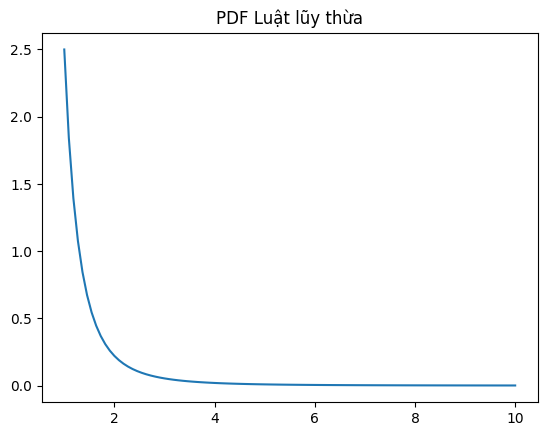

In [5]:
x_space = np.linspace(1, 10, 100)
plt.plot(x_space, powerLawPDF(x_space))
plt.title("PDF Luật lũy thừa")

Và dựa trên hàm mật độ xác suất của luật lũy thừa, chúng ta có thể phát sinh những quan trắc. Ta thực hiện từng bước như sau:
- Bước 01: rút ra hàm phân phối tích lũy $F(x) = P(X \leq x)$
$$F(x) = 1 - \int_{x}^\infty p(t) dt.$$
lấy tích phân bằng kỹ thuật giải tích

Với $ p(x) = Cx^{-\alpha},$ và $C = \frac{\alpha - 1}{x_{\text{min}}^{-\alpha + 1}}$ ta có
$$F(x) = 1 - \int_{x}^\infty C t^{-\alpha} dt = 1 - C \int_{x}^\infty t^{-\alpha} dt = 1 - C \left[ \frac{t^{-\alpha + 1}}{-\alpha + 1} \right]_{x}^\infty = 1 - C \left[ \frac{1}{(\alpha - 1)x^{\alpha - 1}} \right] = 1 - \frac{\alpha - 1}{x_{\text{min}}^{-\alpha + 1}} \frac{1}{(\alpha - 1)x^{\alpha - 1}} = 1 - \left(\frac{x}{x_{\text{min}}}\right)^{1-\alpha}.$$

- Bước 02: các bạn hoàn thành hàm `powerLawCDF` với tham số `x`, `alpha`, và `x_min`

In [6]:
def powerLawCDF(x, alpha=3.5, x_min=1):
    # YOUR CODE HERE
    return 1 - (x / x_min) ** (1 - alpha)

In [7]:
assert adler32(str(powerLawCDF(2, 2, 1)).encode()) == 19136660
assert adler32(str(powerLawCDF(10, 2, 1)).encode()) == 19398808
assert adler32(str(powerLawCDF(2, 3, 1)).encode()) == 32571595

## Task 01: Giả phân phối luật lũy thừa

Gọi $X \sim \text{Power law}$, tức là biến ngẫu nhiên $X$ có phân phối luật lũy thừa.

Gọi $R$ là một biến ngẫu nhiên, mà $R = F(X)$. Ta có, $R$ phân phối đồng nhất trên khoảng $[0, 1]$. Nếu các bạn tò mò lý do tại sao? [Xem chứng minh](https://en.wikipedia.org/wiki/Probability_integral_transform#Proof).

Điều này có nghĩa là chúng ta dễ dàng phát sinh các con số giả ngẫu nhiên (pseudorandom) phân phối đồng nhất và sau đó biến đổi chúng về luật lũy thừa. Ok, bây giờ ta cần tìm một biểu thức cho $x = F^{-1}(r)$, trong đó $r$ là một quan sát từ phân phối đồng nhất trên khoảng $[0,1]$.

Bạn cần đưa ra một dạng giải tích của $F^{-1}(r)$ và viết một hàm `powerLawPPF` (hàm phần trăm từng điểm, percent point function, còn được gọi là một phân vị - quantile) với các tham số bao gồm `r`, `alpha` và `x_min`.

Ta có
$$1 - \left(\frac{x}{x_{\text{min}}}\right)^{1-\alpha} = r$$
$$\implies \left(\frac{x}{x_{\text{min}}}\right)^{1-\alpha} = 1 - r$$
$$\implies \frac{x}{x_{\text{min}}} = (1 - r)^{\frac{1}{1-\alpha}}$$
$$\implies x = x_{\text{min}}(1 - r)^{\frac{1}{1-\alpha}}$$



In [8]:
def powerLawPPF(r, alpha=3.5, x_min=1):
    # YOUR CODE HERE
    return x_min * (1 - r) ** (1 / (1- alpha))

In [9]:
# Test
assert adler32(str(round(powerLawPPF(0.5, 2, 1), 2)).encode()) == 19202193
assert adler32(str(round(powerLawPPF(0.9, 2, 1), 2)).encode()) == 31719616
assert adler32(str(round(powerLawPPF(0.96, 3, 1), 2)).encode()) == 19792020

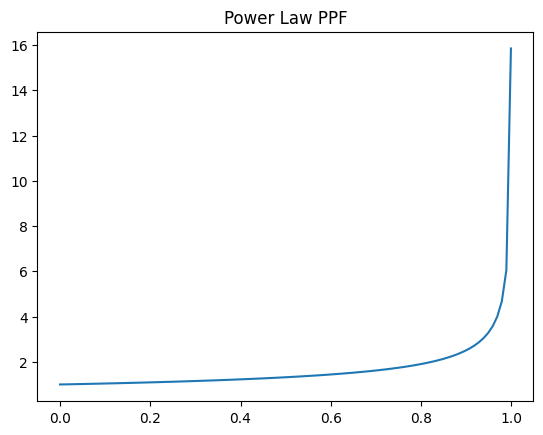

In [10]:
# Visualization
x_space = np.linspace(0, 0.999, 100)
plt.plot(x_space, powerLawPPF(x_space))
plt.title('Power Law PPF');

Và bây giờ, ta có thể phát sinh các quan trắc từ phân phối lũy thừa bằng các bước như sau
- Bước 1: Phát sinh quan trắc từ phân phối đồng nhất trên khoảng $[0, 1]$
- Bước 2: Tính toán giá trị PPF của quan trắc cho trước.

In [11]:
def powerLawGenerate(n, alpha=3.5, x_min=1, random_seed=1):
    np.random.seed(random_seed) # gán seed cho bộ random của numpy
    uni_sample = np.random.uniform(0, 0.999, n) # phát sinh n quan trắc trên khoảng [0, 0.999].
    return powerLawPPF(uni_sample, alpha, x_min)

In [12]:
# Thiết lập một số tham số
alpha = 3.5
x_min = 1
x_train = powerLawGenerate(1000, alpha, x_min)
x_space = np.linspace(1, 15, 100)

Và đây là biểu đồ historgram của mẫu đã được phát sinh.

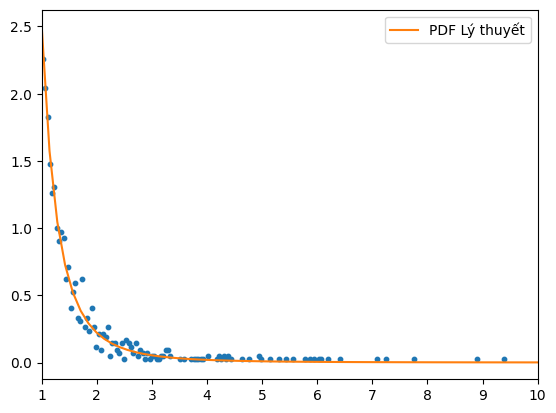

In [13]:
# Visualization
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers[hist > 0], hist[hist > 0], s=10)
plt.plot(
    x_space, powerLawPDF(x_space, alpha, x_min), label="PDF Lý thuyết", c="tab:orange"
)
plt.legend()
plt.xlim(1, 10)
plt.show()  

Và đây là biểu đồ histogram của mẫu đã được phát sinh và đã được log-log scale.

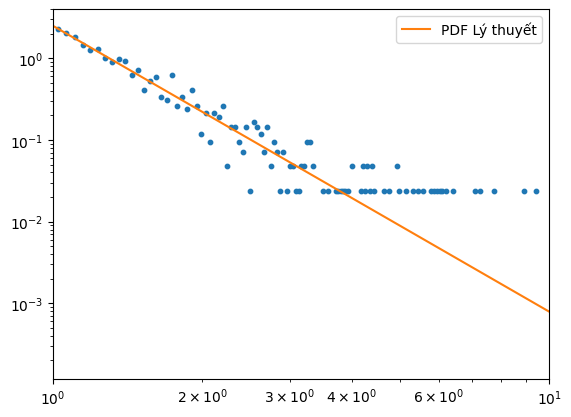

In [14]:
hist, bin_edges = np.histogram(x_train, bins=200, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)
plt.plot(
    x_space, powerLawPDF(x_space, alpha, x_min), label="PDF Lý thuyết", c="tab:orange"
)
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.xlim(1, 10)
plt.show()

Bạn có nhận xét gì?

Tổng quan:

- Biểu đồ đầu tiên cho thấy phân phối của mẫu phát sinh từ phân phối lũy thừa
- Biểu đồ thứ hai cũng cho thấy phân phối lũy thừa nhưng đã được log-log scale. 
- Các điểm màu xanh là vị trí của các bin trong histogram (hoành độ là tâm của bin, tung độ là tần số của bin). Đường màu cam là phân phối lũy thừa lý thuyết.

Nhận xét:

- Biểu đồ đầu tiên cho chúng ta thấy các điểm màu xanh nằm rất gần, hoặc gần như mô phỏng lại được hình dạng của đường màu cam. Qua đó cho thấy dữ liệu phát sinh khớp tốt với phân phối lũy thừa lý thuyết.

- Biểu đồ thứ hai có điểm màu xanh vẫn gần với đường màu cam đến khi x>=3 thì độ phân tán của các điểm rõ rệt không còn khớp chặt với đường màu cam. Nhưng đã nói lên được phân phối lũy thừa: có ít các điểm có giá trị lớn và nhiều các điểm có giá trị nhỏ (đuôi nặng)

Kết luận: Cả hai biểu đồ đều cho thấy dữ liệu phát sinh đã tuân theo phân phối lũy thừa lý thuyết.

## Task 02: Ước lượng của $\alpha$ với linear binning

Cho trước các quan trắc từ phân phối lũy thừa, ta sẽ cố gắng ước lượng $\alpha$. Cách dễ nhất là thử vẽ PDF thực nghiệm với linear binning trong dạng log-log scale (log scale cả hai trục tung-hoành) và sau đó sử dụng linear regression (quá dễ với các bạn đã làm được bài tập đầu tiên của Nhập môn Học máy - Hồi quy tuyến tính, nhưng ở đây không cần các bạn phải implement lại LR).

Nói thêm, linear binning có nghĩa là chúng ta giữ độ rộng của bin cố định.

Trong phần này, các bạn viết và hoàn thành hàm `alphaLRegBins` mà đầu vào của nó gồm một tập huấn luyện, số lượng bin tuyến tính và trả về một ước lượng cho $\alpha$.

Mình nghĩ chắc là sẽ có kiểm định cho $\alpha$ nhưng mà chúng ta chỉ dừng lại việc đưa ra con số thôi. Việc này sẽ để dành cho khóa sau =)))

In [15]:
# Import các thứ, nếu các bạn tự tin thì có thể tự implement lại Linear Regression =))
from sklearn.linear_model import LinearRegression

Gợi ý:
- Lấy log cả hai phía của đẳng thức $p(x) = Cx^{-\alpha}$
- Để tính một PDF thực nghiệm, sử dụng `np.histogram(x_train, bins=bins, density=True)`
- Để tính toán giả nghịch đảo ma trận (pseudoinverse matrix), sử dụng `np.linalg.pinv`
- Sử dụng hồi quy tuyến tính để khớp dữ liệu bằng cách dùng `sklearn.linear.LinearRegression`

In [16]:
def alphaLRegBins(x_train, bins):
    # YOUR CODE HERE
    hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    log_bin_centers = np.log(bin_centers[hist > 0])
    log_hist = np.log(hist[hist > 0])
    
    log_bin_centers = log_bin_centers.reshape(-1, 1)
    log_hist = log_hist.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(log_bin_centers, log_hist)
    
    alpha_hat = -model.coef_[0, 0]
    
    return alpha_hat
    

In [17]:
bins = 100
x_train = powerLawGenerate(1000, x_min=1, alpha=2)
assert adler32(str(np.abs(alphaLRegBins(x_train, bins))).encode()) == 586417073
x_train = powerLawGenerate(1000, x_min=1, alpha=3.5)
assert adler32(str(np.abs(alphaLRegBins(x_train, bins))).encode()) == 582943655
x_train = powerLawGenerate(1000, x_min=1, alpha=10)
assert adler32(str(np.abs(alphaLRegBins(x_train, bins))).encode()) == 523371384

Trực quan hóa bằng biểu đồ

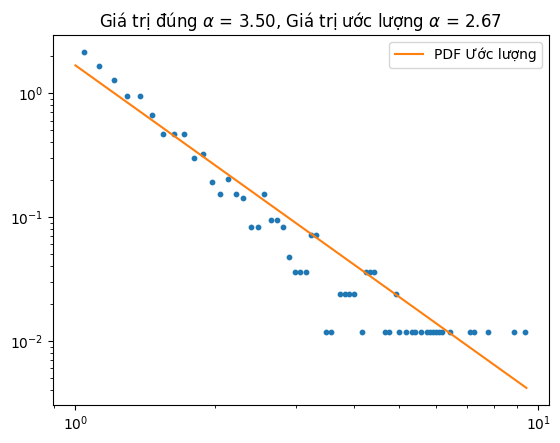

In [18]:
x_min = 1
alpha = 3.5
bins = 100

x_train = powerLawGenerate(1000, alpha, x_min)
hist, bin_edges = np.histogram(x_train, bins=bins, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alphaLRegBins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(
    x_space,
    powerLawPDF(x_space, hat_alpha, x_min),
    label="PDF Ước lượng",
    c="tab:orange",
)
plt.legend()
plt.title(
    r"Giá trị đúng $\alpha$ = {:.2f}, Giá trị ước lượng $\alpha$ = {:.2f}".format(
        alpha, hat_alpha
    )
)
plt.xscale("log")
plt.yscale("log")
plt.show()

## Task 03: Ước lượng $\alpha$ với logarithmic binning

Như chúng ta đã thấy việc ước lượng với linear binning là tương đối chưa chính xác. Với kỹ thuật này, logarithmic binning, chúng ta để kích thước bin tăng theo một giá trị nào đó. Việc này đảm bảo rằng mỗi bin có một số lượng quan trắc tương đương nhau.

Trong phần này, các bạn viết và hoàn thành hàm `alphaLogBins` mà đầu vào của nó gồm một tập huấn luyện, số lượng bin logarith và trả về một ước lượng cho $\alpha$.

In [19]:
def alphaLogBins(x_train, bins):
    # YOUR CODE HERE
    bin_edges = np.logspace(np.log10(1), np.log10(x_train.max()), bins)
    hist, _ = np.histogram(x_train, bins=bin_edges, density=True)
    
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    
    log_bin_centers = np.log(bin_centers[hist > 0])
    log_hist = np.log(hist[hist > 0])
    
    log_bin_centers = log_bin_centers.reshape(-1, 1)
    log_hist = log_hist.reshape(-1, 1)
    
    model = LinearRegression()
    model.fit(log_bin_centers, log_hist)
    
    alpha_hat = -model.coef_[0, 0]
    
    return alpha_hat

In [20]:
bins = 100
x_train = powerLawGenerate(1000, x_min=1, alpha=2)
# assert adler32(str(np.abs(alphaLogBins(x_train, bins))).encode()) == 586744763
x_train = powerLawGenerate(1000, x_min=1, alpha=3.5)
assert adler32(str(np.abs(alphaLogBins(x_train, bins))).encode()) == 584647596
x_train = powerLawGenerate(1000, x_min=1, alpha=10)
assert adler32(str(np.abs(alphaLogBins(x_train, bins))).encode()) == 458294066

Trực quan hóa bằng biểu đồ

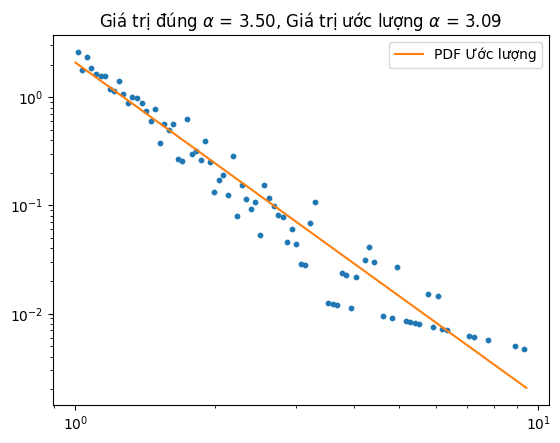

In [21]:
x_min = 1
alpha = 3.5
bins = 100

x_train = powerLawGenerate(1000, alpha, x_min)
binning = np.logspace(np.log10(x_min), np.log10(x_train.max()), bins)
hist, bin_edges = np.histogram(x_train, bins=binning, density=True)
bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.scatter(bin_centers, hist, s=10)

hat_alpha = alphaLogBins(x_train, bins)
x_space = np.linspace(x_min, x_train.max(), 100)
plt.plot(
    x_space,
    powerLawPDF(x_space, hat_alpha, x_min),
    label="PDF Ước lượng",
    c="tab:orange",
)
plt.legend()
plt.title(
    r"Giá trị đúng $\alpha$ = {:.2f}, Giá trị ước lượng $\alpha$ = {:.2f}".format(
        alpha, hat_alpha
    )
)
plt.xscale("log")
plt.yscale("log")
plt.show()

Quá tuyệt vời :-) giá trị ước lượng alpha của chúng ta đã gần sát với mục tiêu.

## Task 04: Phát sinh đồ thị với phân phối bậc cho trước

Chúng ta sẽ thử phát sinh đồ thị với phân phối bậc cho trước.

**Đồ thị A** được mô tả như sau:
- Có 0 đỉnh có bậc 0
- Có 2 đỉnh có bậc 1
- Có 15 đỉnh có bậc 2
- Đồ thị này _liên thông_

In [22]:
# YOUR CODE HERE
dens_a = [0, 2, 15]


In [23]:
# Test
assert adler32(str(dens_a).encode()) == 191496729


In [24]:
def generateGraphA(dens_a: list) -> nx.Graph:
    # YOUR CODE HERE
    G = nx.Graph()
    
    # Tạo các node    
    G.add_nodes_from(range(1,sum(dens_a)+1))
    
    # Tạo các cạnh của đỉnh bậc 2
    for i in range(2,dens_a[2]+1):
        G.add_edge(i,i+1)
    
    # Nối 2 đỉnh đầu và cuối để có 2 đỉnh bậc 1
    G.add_edges_from([(1,2),(sum(dens_a),sum(dens_a)-1)])

    return G

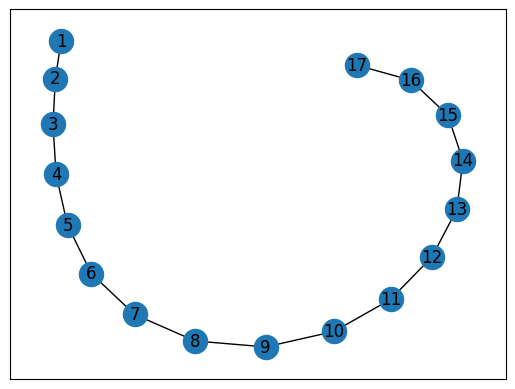

In [25]:
# Test
G = generateGraphA(dens_a=dens_a)
assert nx.degree_histogram(G) == dens_a
assert nx.is_connected(G)
nx.draw_networkx(G)

**Đồ thị B** được mô tả như sau:
- Có 0 đỉnh có bậc 0
- Có 0 đỉnh có bậc 1
- Có 10 đỉnh có bậc 2
- Đồ thị này _liên thông_

In [26]:
# YOUR CODE HERE
dens_b = [0, 0, 10]

In [27]:
# Test
assert adler32(str(dens_b).encode()) == 190054930

In [28]:
def generateGraphB(dens_b: list) -> nx.Graph:
    # YOUR CODE HERE
    
    G = nx.Graph()
    
    G.add_nodes_from(range(1,sum(dens_b)+1))
    
    for i in range(1,dens_b[2]):
        G.add_edge(i,i+1)
        
    G.add_edge(1, dens_b[2])
    return G

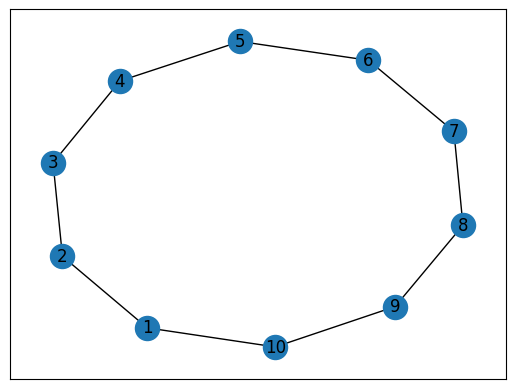

In [29]:
# Test
G = generateGraphB(dens_b=dens_b)
assert nx.degree_histogram(G) == dens_b
assert nx.is_connected(G)
nx.draw_networkx(G)